# Agriculture in Peru
    # People Economically Active in Agriculture (Years 2011 - 2021)

<Figure size 1000x800 with 0 Axes>

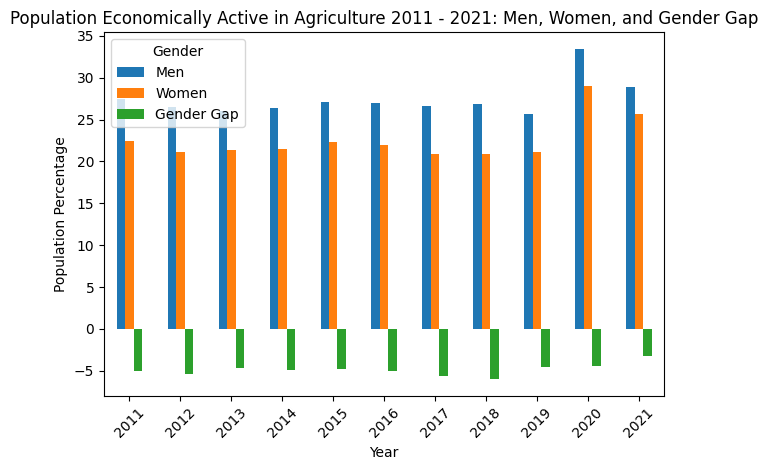

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv(r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\csv files\#11_python_final_assignment\#3_bottomline_csv_ datasets\employment_sector_gender.csv')

# Filter rows based on column: 'region_id' for national level (assuming 0 represents national level)
df = df[df['region_id'] == 0]

# Filter rows based on column: 'sector'
df = df[df['sector'] == "Agricultura"]

# Filter rows based on column: 'gender'
df = df[df['gender'] != "Total"]

# Rename columns
df = df.rename(columns={'Sum of year': 'year', 'Sum of value_percent': 'employment_sectors_percentage'})

# Replace all instances of "Mujeres" with "Women" in column: 'gender'
df.loc[df['gender'].str.lower() == "Mujeres".lower(), 'gender'] = "Women"

# Replace all instances of "Hombres" with "Men" in column: 'gender'
df.loc[df['gender'].str.lower() == "Hombres".lower(), 'gender'] = "Men"

# Pivot the dataframe to get 'Women' and 'Men' employment percentages in separate columns
pivot_df = df.pivot(index='year', columns='gender', values='employment_sectors_percentage')

# Calculate the gender gap by subtracting 'Men' from 'Women'
pivot_df['Gender Gap'] = pivot_df['Women'] - pivot_df['Men']

# Reset index to get 'year' as a column
pivot_df.reset_index(inplace=True)

# Plot the chart comparing men, women, and the gender gap
plt.figure(figsize=(10, 8))
pivot_df.plot(x='year', y=['Men', 'Women', 'Gender Gap'], kind='bar')
plt.title('Population Economically Active in Agriculture 2011 - 2021: Men, Women, and Gender Gap')
plt.xlabel('Year')
plt.ylabel('Population Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Gender')
plt.show()